# Create comparison plots between Cloudy and Python

The Ferland definition of ionization parameter is in the variable ip.

This version allows one to specify the directories where the data is, and does not require one to actually put the data in the local directory

In [9]:
import os
os.getcwd()

'/Users/long/Projects/Python/release-models/cloudy/compare'

In [10]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import roman

In [11]:
CLOUDY='../cloudy'
# CLOUDY='/Users/long/Projects/Cloudy'
# PYTHON='../cloudy_compare_converge'
# PYTHON='../cloudy_compare'
# PYTHON='../cloudy_compare_macro'
PYTHON='../python'


**Specify here which version of python one wishes to create the Cloudy comparisons for**

In [12]:
version='87z'
version='87i'
version='88a'
py_he='Sum_py%s_He_pl.txt' % version
py_c='Sum_py%s_C_pl.txt' % version
py_n='Sum_py%s_N_pl.txt' % version
py_o='Sum_py%s_O_pl.txt' % version
py_fe='Sum_py%s_Fe_pl.txt' % version

In [13]:
def read_cloudy(filename='cl_helium_PL.dat'):
    xfile='%s/%s' % (CLOUDY,filename)
    try:
        x=ascii.read(xfile)
    except:
        print('Error: Could not find %s' % xfile)
        return None
    # x.info()
    names=x.colnames
    x.rename_column('col1','ip')
    j=1
    while j<len(names):
        x.rename_column(names[j],'i%02d' % (j))
        j+=1
    return x

read_cloudy()

ip,i01,i02,i03
float64,float64,float64,float64
-8.0,0.986,0.0144,6.24e-06
-7.9,0.983,0.0171,8.38e-06
-7.8,0.98,0.0203,1.12e-05
-7.7,0.976,0.0239,1.49e-05
-7.6,0.972,0.0281,1.98e-05
-7.5,0.967,0.0329,2.62e-05
...,...,...,...
6.4,2.63e-20,7.62e-10,1.0
6.5,2.08e-20,6.2e-10,1.0


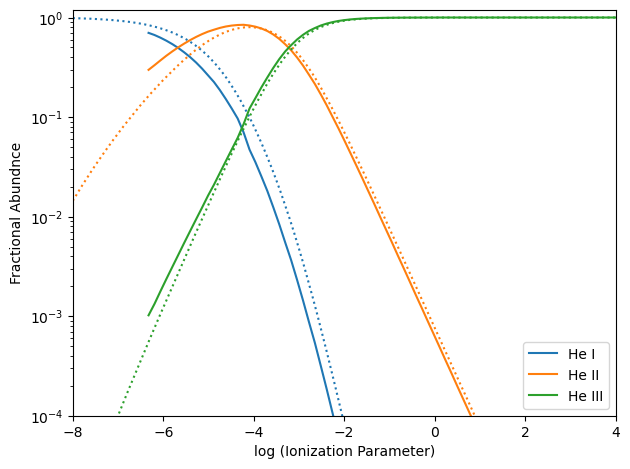

In [14]:



def plot_one(cloudy='cl_helium_PL.dat',python=py_he,element='He',imin=0,imax=0,ipmin=-8,ipmax=4):
    pfile='%s/%s' % (PYTHON,python)
    try:
        xp=ascii.read(pfile)
    except:
        print('Error: Could not read %s' % pfile)
        return None
    
    xc=read_cloudy(cloudy)
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colname=xc.colnames
    if imin<=0:
        i=1
    else:
        i=imin

    if imax<=0 or imax+1>len(colname):
        imax=len(colname)
    else:
        imax=imax+1
    color_index=0
    while i<imax:
        xlabel='%s %s' % (element,roman.toRoman(i))
        plt.semilogy(xc['ip'],xc[colname[i]],':',color=color_cycle[color_index])
        plt.semilogy(np.log10(xp['ip']),xp[colname[i]],color=color_cycle[color_index],label=xlabel)
        i+=1
        color_index+=1
        if color_index==len(color_cycle):
            color_index=0
    plt.legend()
    plt.xlabel('log (Ionization Parameter)')
    plt.ylabel('Fractional Abundnce')
    plt.ylim(1e-4,1.2)
    if ipmin!=0 or ipmax!=0:
        plt.xlim(ipmin,ipmax)
    plt.tight_layout()
    plt.savefig(python.replace('.txt','.png'))

plot_one()

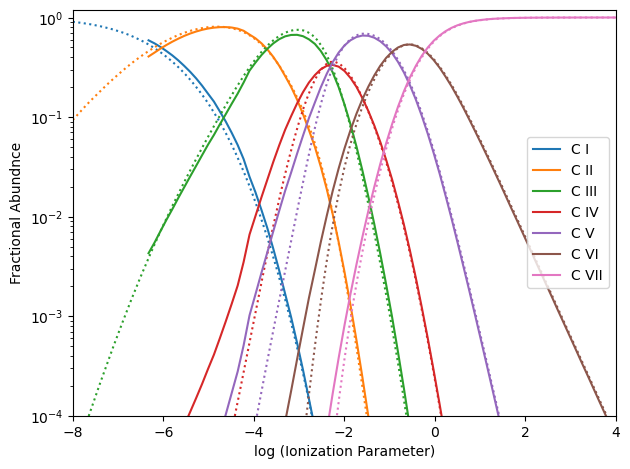

In [15]:
plot_one(cloudy='cl_carbon_PL.dat',python=py_c,element='C',ipmin=-8,ipmax=4)

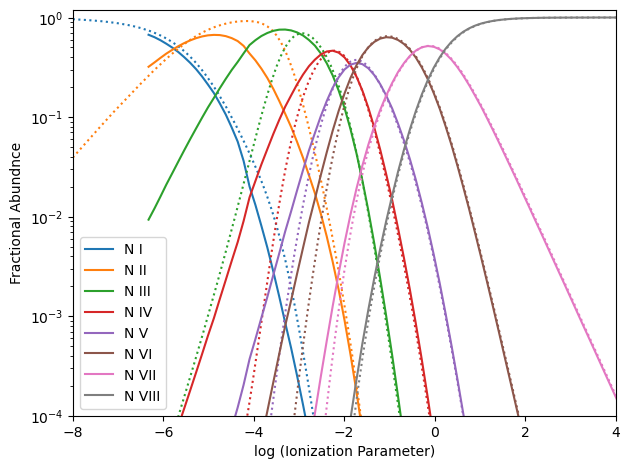

In [16]:
plot_one(cloudy='cl_nitrogen_PL.dat',python=py_n,element='N',ipmin=-8,ipmax=4)

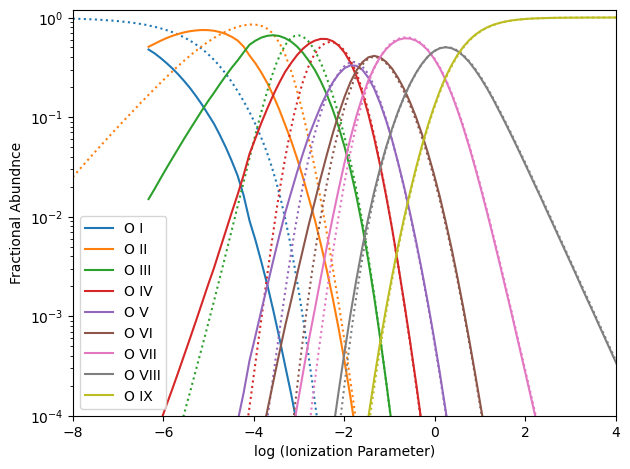

In [17]:
plot_one(cloudy='cl_oxygen_PL.dat',python=py_o,element='O',ipmin=-8,ipmax=4)

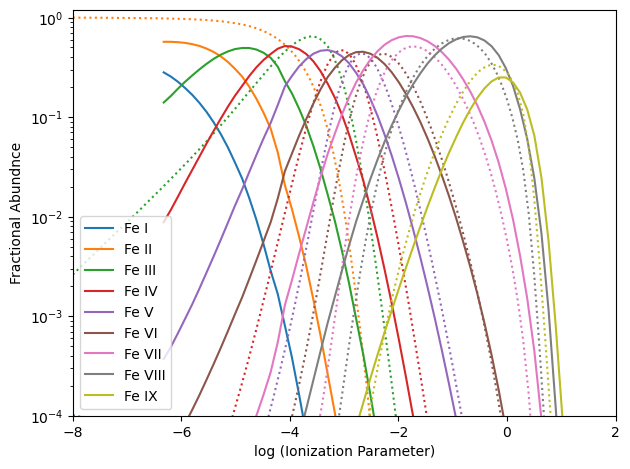

In [18]:
plot_one(cloudy='cl_iron_PL.dat',python=py_fe,element='Fe',imax=9,ipmin=-8,ipmax=2)

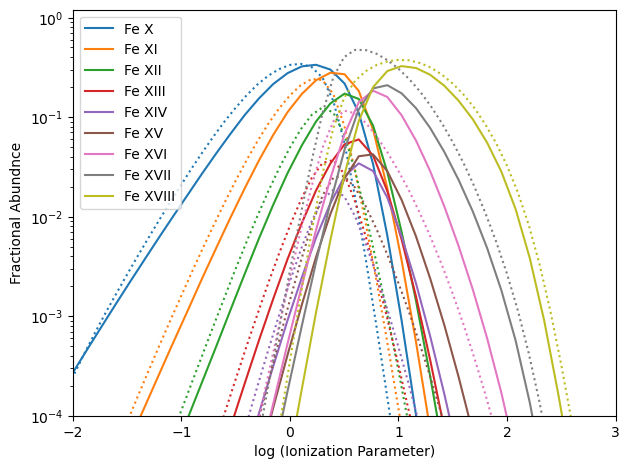

In [19]:
plot_one(cloudy='cl_iron_PL.dat',python=py_fe,element='Fe',imin=10,imax=18,ipmin=-2,ipmax=3)

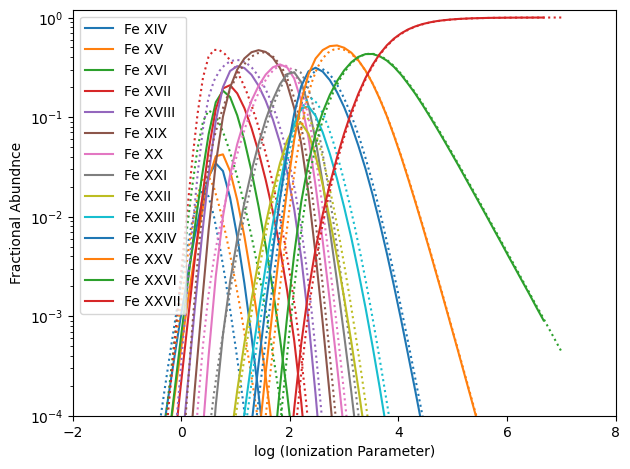

In [20]:
plot_one(cloudy='cl_iron_PL.dat',python=py_fe,element='Fe',imin=14,imax=27,ipmin=-2,ipmax=8)

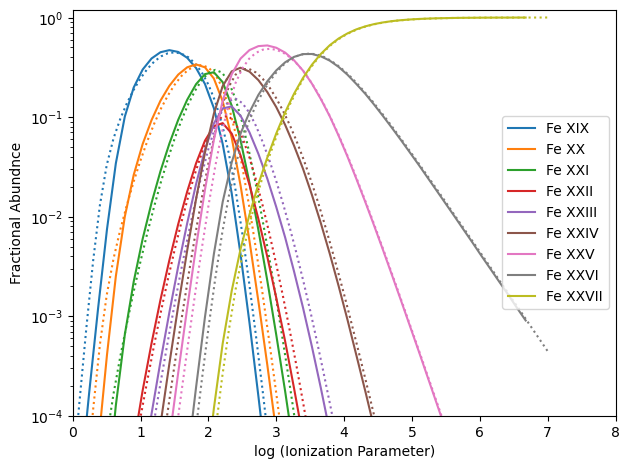

In [21]:
plot_one(cloudy='cl_iron_PL.dat',python=py_fe,element='Fe',imin=19,imax=27,ipmin=0,ipmax=8)

/var/folders/tq/5yb4qm590qxbk0ykb4ft0nyc000401/T/ipykernel_51884/1965574504.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


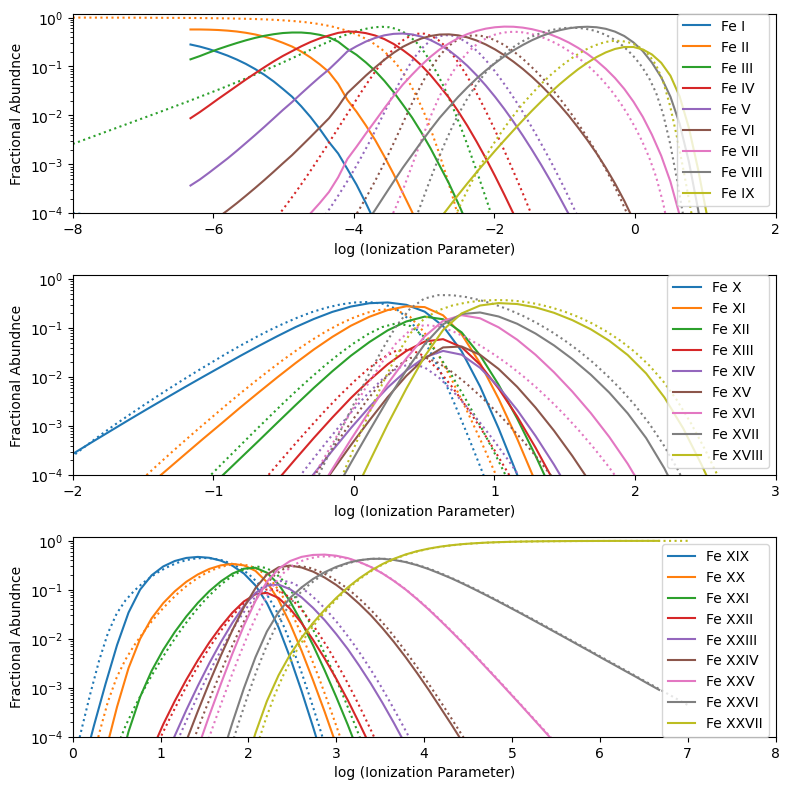

In [22]:
def do_fe(cloudy='cl_iron_PL.dat',python=py_fe):
    plt.figure(1,(8,8))
    plt.subplot(3,1,1)
    plot_one(cloudy,python,element='Fe',imax=9,ipmin=-8,ipmax=2)
    plt.subplot(3,1,2)
    plot_one(cloudy,python,element='Fe',imin=10,imax=18,ipmin=-2,ipmax=3)
    plt.subplot(3,1,3)
    plot_one(cloudy,python,element='Fe',imin=19,imax=27,ipmin=0,ipmax=8)

do_fe()

/var/folders/tq/5yb4qm590qxbk0ykb4ft0nyc000401/T/ipykernel_51884/1965574504.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


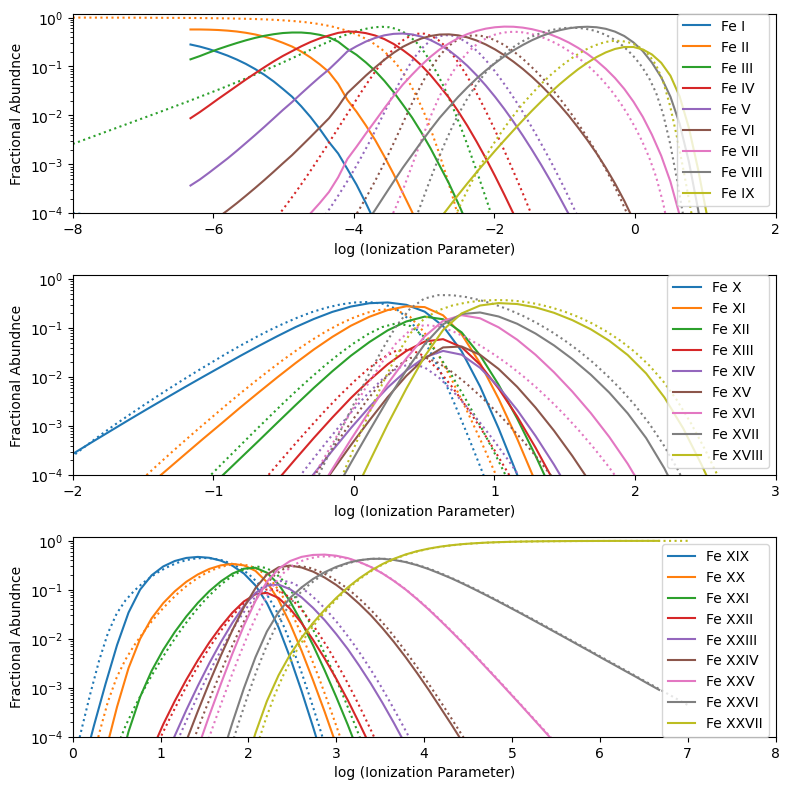

In [23]:

do_fe()

In [24]:
pfile='%s/%s' % (PYTHON,py_c)
xp=ascii.read(pfile)
xp.info()

<Table length=100>
  name    dtype 
-------- -------
       i   int64
converge   int64
     t_e float64
     t_r float64
      ip float64
      xi float64
     i01 float64
     i02 float64
     i03 float64
     i04 float64
     i05 float64
     i06 float64
     i07 float64


(0.001, 1.2)

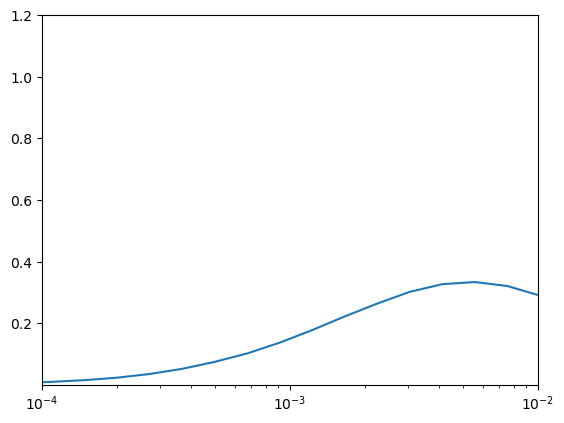

In [25]:
plt.semilogx(xp['ip'],xp['i04'])
plt.xlim(1e-4,1e-2)
plt.ylim(1e-3,1.2)